In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from scipy.stats import ttest_ind

<h1>Executive Summary</h1>
<p>My Prep Course Capstone is an exploratory analysis of Lending Club loan data from Q4 2017. I started out with three hyptheses - 1)Lending Club primarily offers business loans; 2)business loans have the highest loan amounts; and 3) there is no correlation between loan amount and interest rate. I proved two of the three. In doing so, (1)I explored and vizualized the various relationships between interest rate, loan amount, term, loan purpose, and ROI. ROI was not initially included in the data set, therefore it was manually calculated and added to the data. I also conducted a T-tests to verify my findings that small business loans have the highest loan amounts and that there is no correlation between loan amount and interest rate. </p>

<p>The exploration yielded a couple key insights. First and foremost, Lending Club is a consumer loan company, and more specifically, a debt consolidation company. Second, and perhaps most importantly, term lenghth plays a critical role in ROI. We can infer from the data that Lending Club is aware of this and has optimized their loan offerings in a way that both benefits the company and consumers.</p>

<h1>Introduction</h1>
<p>For my Prep Course Captsone project I will be exploring data provided directly from Lending Club, an alternative loan provider. Specifically, I'll be focusing on data from Q4 2017. Lending Club is one of the largest alternative lending institutions in the US and one of only a few that publishes its loan data. This exploration is a great introduction to what a data analyst role might include at Lending Club or at similar institutions.</p>

<h1>Hypotheses</h1>
<ul>
    <li>I expect that Lending Club to primarily offer business loans.</li>
    <li>I expect business loans to have a higher loan amount than any other loan type. </li> 
    <li>I expect there to be no correlation between loan size and interest rate.</li>
</ul>

<h1>Data</h1>

<p>The data itself is a single table that contains the records of over 100,000 loans originated between Nov-Dec 2017 that range from a couple thousand dollars to $40,000 in value. Given its size, I determined that focusing exclusively on this time period would be sufficient.</p> 

<p> Lending Club records a lot of metrics regarding each loan but I'll be focusing on only a few of them: 
<ul> 
    <li> Loan Amount: 2,500-40,000 dollars</li>
    <li> Interest Rate: 5.00-33.00 percent </li>
    <li> Purpose: the stated reason for applying for the loan</li>
    <li> Grade: the composite risk score associated with the loan </li>
    <li> Term: the duration of the loan </li>
</ul>
</p>

<p>It is worth noting that there were a few simple things I had to do to both load the data properly and clean the data. 
<ul>
    <li>Add arguments to account for zip file compression and the size of the file - compression='zip', low_memory=False </li>
    <li>Manually remove the blank row atop of the data - skiprows=1</li>
    <li>Remove the percentage sign from the interest rate field and make sure its dtype is float. </li>
    <li>Remove the word 'months' from the term field and make sure its dtype is set float. </li>
</ul>
</p>



In [3]:
df =pd.read_csv('LoanStats_2017Q4.csv.zip', skiprows=1, compression='zip', low_memory=False)

In [4]:
df['int_rate_str'] = df['int_rate'].str.replace('%', '')

In [5]:
#creating a new column with a clean interest rate as a float
df['int_rate_clean'] = df['int_rate_str'].astype(float)

In [6]:
df['term_str'] = df['term'].str.replace('months', '')

In [7]:
#creating a new column with a clean term value as a float
df['term_clean'] = df.term_str.astype(float)

<h1>Analytical Questions</h1>
<p><strong>#1 What size loans does Lending Club offer? What is the loan amount distribution?</strong><p>

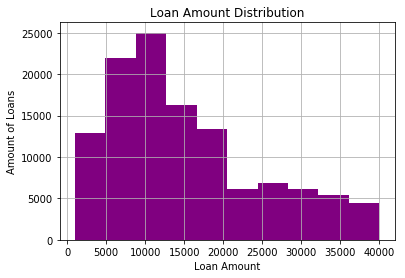

In [7]:
df.loan_amnt.hist(color='purple')
plt.xlabel('Loan Amount')
plt.ylabel('Amount of Loans')
plt.title('Loan Amount Distribution');

<p> Lending Club offers loans ranging from a couple thousand dollars to 40,000 dollars, majority of which are between 5,000 dollars and 15,000 dollars.</p>

<p><strong>#2 What types of loans does Lending Club offer? Is there any difference in loan size based on the purpose of the loan? </strong></p>

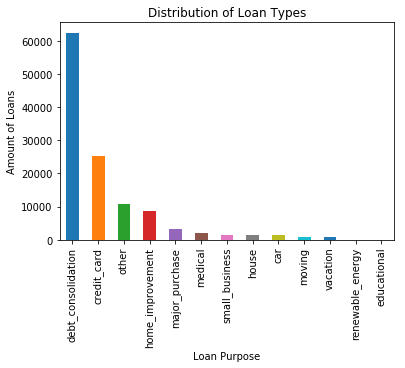

In [8]:
df.purpose.value_counts().plot.bar()
plt.xlabel('Loan Purpose')
plt.ylabel('Amount of Loans')
plt.title('Distribution of Loan Types');

<p>We can see that Lending Club offers more than just business loans. In fact, it looks more like the company focuses on debt consolidation and credit card loans more than anything. It's interesting to note that there are also loans available for vacations. </p>
<p>What we don't see here though is whether or not loan size is consistent amongst loan purposes.</p>

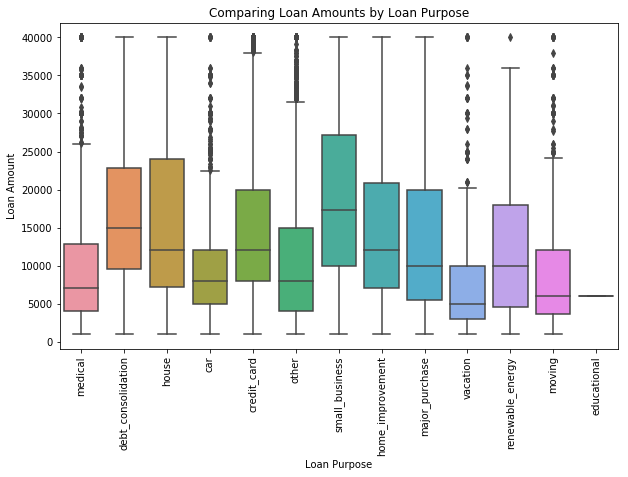

In [9]:
plt.figure(figsize=(10,6))
sns.boxplot(x='purpose', y='loan_amnt', data=df)
plt.xticks(rotation=90) #rotates the variable names on the x axis
plt.ylabel('Loan Amount')
plt.xlabel('Loan Purpose')
plt.title('Comparing Loan Amounts by Loan Purpose');

<p>The graph above shows us that loans sizes do not vary significantly by loan purpose, but small business loans do tend to be larger than any other type of loan as evidenced by the category having the highest median value of any loan type. We can conduct a t-test to confirm this. In order to statistically prove that small business loans tend to be larger than any other loan type I expect to see all negative t-values and p-values of less than 0.0045455. I arrived on a p-value of 0.0045455 due to the Bonferroni correction, which factors in multiple groups. One thing to note is that I did not sample Renewable Energy or Education. This is because there weren't enough loans to provide an adequate sample.</p>

In [18]:
#gather a sample of all the loan purposes
debt_consolidation_sample = df[df.purpose == 'debt_consolidation'].sample(500)
house_sample = df[df.purpose == 'house'].sample(500)
car_sample = df[df.purpose == 'car'].sample(500)
credit_card_sample = df[df.purpose == 'credit_card'].sample(500)
small_business_sample = df[df.purpose == 'small_business'].sample(500)
other_sample = df[df.purpose == 'home_improvement'].sample(500)
home_improvement_sample = df[df.purpose == 'home_improvement'].sample(500)
major_purchase_sample = df[df.purpose == 'major_purchase'].sample(500)
vacation_sample = df[df.purpose == 'vacation'].sample(500)
moving_sample = df[df.purpose == 'moving'].sample(500)
medical_sample = df[df.purpose == 'medical'].sample(500)

#create an array of all the t-vals and p-vals
small_business_statistics = np.array([ttest_ind(debt_consolidation_sample.loan_amnt, small_business_sample.loan_amnt, equal_var=False),
                            ttest_ind(credit_card_sample.loan_amnt, small_business_sample.loan_amnt, equal_var=False), 
                            ttest_ind(other_sample.loan_amnt, small_business_sample.loan_amnt, equal_var=False),
                            ttest_ind(home_improvement_sample.loan_amnt, small_business_sample.loan_amnt, equal_var=False),
                            ttest_ind(major_purchase_sample.loan_amnt, small_business_sample.loan_amnt, equal_var=False),
                            ttest_ind(medical_sample.loan_amnt, small_business_sample.loan_amnt, equal_var=False), 
                            ttest_ind(house_sample.loan_amnt, small_business_sample.loan_amnt, equal_var=False),
                            ttest_ind(car_sample.loan_amnt, small_business_sample.loan_amnt, equal_var=False),
                            ttest_ind(moving_sample.loan_amnt, small_business_sample.loan_amnt, equal_var=False),
                            ttest_ind(vacation_sample.loan_amnt, small_business_sample.loan_amnt, equal_var=False)])
#convert the array into a df and label accordingly
small_business_stats_df = pd.DataFrame(small_business_statistics)

small_business_stats_df.index = [['Small Business']*len(small_business_statistics),
                                 ['Debt Consolidation', 'Credit Card', 'Other', 'Home Improvement', 'Major Purchase', 'Medical', 'House', 'Car', 'Moving', 'Vacation']]
small_business_stats_df.columns = ['T-Value', 'P-Value']

In [19]:
small_business_stats_df

T-Value       P-Value
Small Business Debt Consolidation  -3.780602  1.658757e-04
               Credit Card         -6.760445  2.374236e-11
               Other               -6.128191  1.278913e-09
               Home Improvement    -5.666579  1.907608e-08
               Major Purchase      -6.308252  4.235605e-10
               Medical            -14.829048  8.548166e-45
               House               -5.897818  5.045083e-09
               Car                -15.894696  4.259749e-50
               Moving             -15.449665  3.561761e-48
               Vacation           -20.508173  5.717738e-76

<p>We can confirm that all T-values are negative and that all P-values are less than the required value of 0.0045455. The chart can be interpretted as each loan purpose sample has a loan amount mean that is X times smaller than the loan amount mean for small businesses, where X = T-value. We can be certain that this isn't due to noise in the data because our p-values are all below the established p-value threshold for certainty.</p>

<p><strong>#3. What type of interest rates does Lending Club offer? Is there a correlation between loan amount and interest rate? </strong></p>

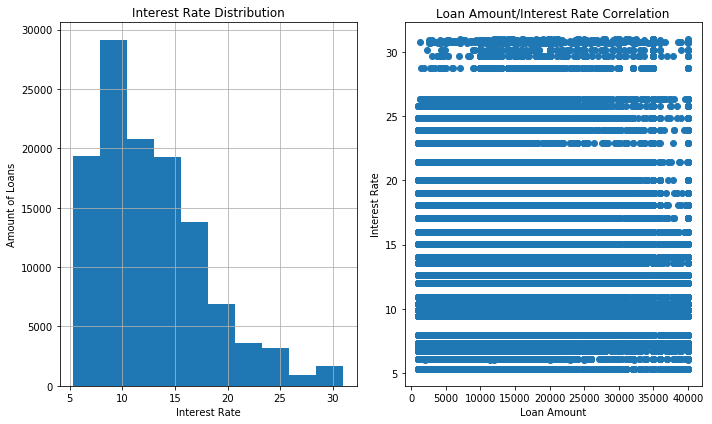

In [10]:
plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
df.int_rate_clean.hist()
plt.xlabel('Interest Rate')
plt.ylabel('Amount of Loans')
plt.title('Interest Rate Distribution')

plt.subplot(1,2,2)
plt.scatter(x=df['loan_amnt'], y=df['int_rate_clean'])
plt.ylabel('Interest Rate')
plt.xlabel('Loan Amount')
plt.title('Loan Amount/Interest Rate Correlation')

plt.tight_layout();


<p>We can see that Lending Club interest rates range from roughly 6% to 32%. </p>
<p>It's not uncommon to hear people ask if interest rates and the loan amounts are tied together (i.e. the interest rate should go down if the loan amount goes down). The answer to that is simply no. In our graph above we can see that there is no correlation between loan size and interest rate. To be sure though, we can run a t-test. </p>
<p>T-tests are primarily conducted between two groups, so in order to properly execute a standard T-test we will need to do some sort of grouping. The are various ways to group the loan amounts but I chose four groups:
    <ul>
        <li>Under 10K: 0-10,000</li>
        <li>Between 10K and 20K: 10,001-20,000</li>
        <li>Between 20K and 30K: 20,001-30,000</li>
        <li>Over 30K: 30,001-40,000</li>
        </ul>
<p>My hypothesis regarding the T-tests is that there is no correlation between interest rates of any of the groups. In order to prove my hypothesis I will need to see t-values greater than 2 or less than negative 2 and a p-value less than 0.0125. I arrived on a p-value of 0.0125 due to the Bonferroni correction, which factors in multiple groups.</p>       

In [9]:
#create the four groups
under_10k = df[df.loan_amnt <= 10000.0]
between10k_20k = df[(df.loan_amnt > 10000.0) & (df.loan_amnt <= 20000.0)]
between20k_30k = df[(df.loan_amnt > 20000.0) & (df.loan_amnt <= 30000.0)]
over_30k = df[(df.loan_amnt >30000.0)]

In [12]:
#take samples of the interest rates in each group
under_10k_sample = np.random.choice(under_10k.int_rate_clean, 5000)
between10k_and_20k_sample = np.random.choice(between10k_20k.int_rate_clean, 5000)
between20k_and_30k_sample = np.random.choice(between20k_30k.int_rate_clean, 5000)
over_30k_sample = np.random.choice(over_30k.int_rate_clean, 5000)
#conduct T-tests and format results as an array
under_10k_statistics = np.array([ttest_ind(between10k_and_20k_sample, under_10k_sample, equal_var=False),
                                 ttest_ind(between20k_and_30k_sample, under_10k_sample, equal_var=False), 
                                 ttest_ind(over_30k_sample, under_10k_sample, equal_var=False)])

between_10k_and_20k_statistics = np.array([ttest_ind(under_10k_sample, between10k_and_20k_sample, equal_var=False),
                                 ttest_ind(between20k_and_30k_sample, between10k_and_20k_sample, equal_var=False), 
                                 ttest_ind(over_30k_sample, between10k_and_20k_sample, equal_var=False)])

between20k_and_30k_statistics = np.array([ttest_ind(under_10k_sample, between20k_and_30k_sample, equal_var=False),
                                 ttest_ind(between10k_and_20k_sample, between20k_and_30k_sample, equal_var=False), 
                                 ttest_ind(over_30k_sample, between20k_and_30k_sample, equal_var=False)])

over_30k_statistics = np.array([ttest_ind(under_10k_sample, over_30k_sample, equal_var=False),
                               ttest_ind(between10k_and_20k_sample, over_30k_sample, equal_var=False),
                               ttest_ind(between20k_and_30k_sample, over_30k_sample, equal_var=False)])
#create data frames from the results with labeling for display
under_10k_stats_df = pd.DataFrame(under_10k_statistics, columns=['T-value', 'P-value'], index=['Between 10k and 20k', 'Between 20k and 30k', 'Over 30k'])
between_10k_and_20k_stats_df = pd.DataFrame(between_10k_and_20k_statistics, columns=['T-value', 'P-value'], index=['Under 10k', 'Between 20k and 30k', 'Over 30k'])
between_20k_and_30k_stats_df = pd.DataFrame(between20k_and_30k_statistics, columns=['T-value', 'P-value'], index=['Under 10k', 'Between 10k and 20k', 'Over 30k'])
over_30k_stats_df = pd.DataFrame(over_30k_statistics, columns=['T-value', 'P-value'], index=['Under 10k', 'Between 10k and 20k', 'Between 20k and 30k'])

#combine the data frames and index each group according 
statistics_df = pd.concat([under_10k_stats_df,between_10k_and_20k_stats_df,between_20k_and_30k_stats_df,over_30k_stats_df], keys=['Under 10k (0-10,000)', 'Between 10k and 20k (10,001-20,000)', 'Between 20k and 30k (20,001-30,000)', 'Over 30k (30,001-40,000)'])

statistics_df

T-value  \
Under 10k (0-10,000)                Between 10k and 20k  11.621691   
                                    Between 20k and 30k  17.626041   
                                    Over 30k              6.664975   
Between 10k and 20k (10,001-20,000) Under 10k           -11.621691   
                                    Between 20k and 30k   6.133463   
                                    Over 30k             -4.407661   
Between 20k and 30k (20,001-30,000) Under 10k           -17.626041   
                                    Between 10k and 20k  -6.133463   
                                    Over 30k            -10.262877   
Over 30k (30,001-40,000)            Under 10k            -6.664975   
                                    Between 10k and 20k   4.407661   
                                    Between 20k and 30k  10.262877   

                                                              P-value  
Under 10k (0-10,000)                Between 10k and 20k  5.103618e-31  
                                    Between 20k and 30k  1.867076e-68  
                                    Over 30k             2.791227e-11  
Between 10k and 20k (10,001-20,000) Under 10k            5.103618e-31  
                                    Between 20k and 30k  8.926077e-10  
                                    Over 30k             1.055848e-05  
Between 20k and 30k (20,001-30,000) Under 10k            1.867076e-68  
                                    Between 10k and 20k  8.926077e-10  
                                    Over 30k             1.371852e-24  
Over 30k (30,001-40,000)            Under 10k            2.791227e-11  
                                    Between 10k and 20k  1.055848e-05  
                                    Between 20k and 30k  1.371852e-24

<p>We can see from the table above there is no correlation between loan amounts and interest rates and we can say that with great certainty due to the very low p-values. However, interest rates do closely mirror the loan grade provided. Again, we can think of loan grades as a composite risk score. </p>

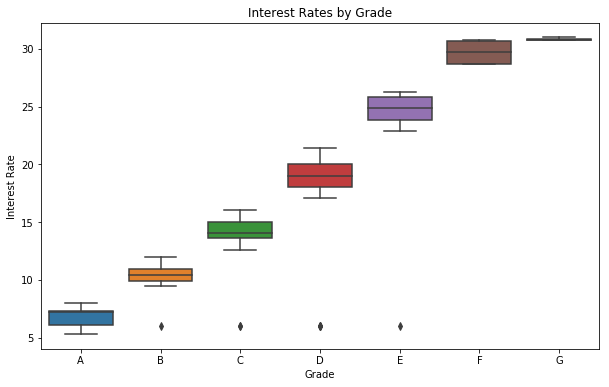

In [12]:
plt.figure(figsize=(10,6))
sns.boxplot(x='grade', y='int_rate_clean', data=df.sort_values('grade'))
plt.title('Interest Rates by Grade')
plt.xlabel('Grade')
plt.ylabel('Interest Rate');

<p>The graph above shows interest rates and loan grades typically go hand in hand. However, there some outliers - 6% interest rates for D and E grade loans - that are worth exploring further at some point. </p>

<hp><strong>#4. Do loan grades impact the loan amount? </strong><p>
<p>In other words, I really want to know whether or not you can receive a large loan regardless of what grade you receive. Conventional wisdom is that you would not offer large loans to those with lower composite scores (E,G and F). </p>

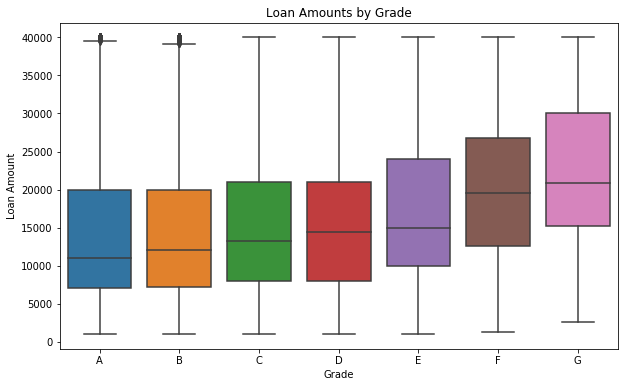

In [13]:
plt.figure(figsize=(10,6))
sns.boxplot(x='grade', y='loan_amnt', data=df.sort_values('grade'))
plt.title('Loan Amounts by Grade')
plt.xlabel('Grade')
plt.ylabel('Loan Amount');

<p>There are a few key obserations that can be made from this graph. Not only do we see that (A) you can receive a large loan amount with a lower composite grade, (B) we see a slight uptick in loan amount starting at grade E, and (C) grades F and G loans appear to have the largest loan amounts. However, this might be a false positive. If we look at the distribution of loans by grade we see that grades F and G are the least represented in the groups. </p>

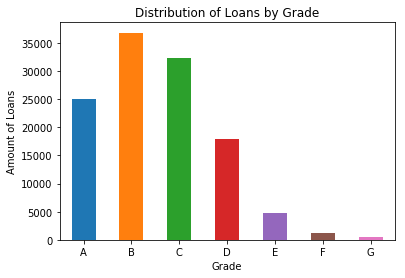

In [14]:
df.grade.value_counts().sort_index().plot.bar()
plt.xticks(rotation=0)
plt.xlabel('Grade')
plt.ylabel('Amount of Loans')
plt.title('Distribution of Loans by Grade');

<p> With grades F and G being so poorly represented in the distribution, their ranges can be greatly affected by extreme values on either end of the spectrum. </p>

<p><strong> #5. What is the average ROI on Lending Club loans? Are there any fields that significantly impact ROI?</strong></p>
<p>The first thing we need to do here is create a new column that contains the ROI of each loan. Simple ROI can be calculated as (Total Return / Loan Amount) x 100, where Total Return = Installment x Term. </p>

In [15]:
df['total_return'] = df['term_clean']*df['installment']

In [16]:
df['roi'] = (df['total_return']/df['loan_amnt'])*100

In [17]:
df.roi.mean()

127.06104291839328

<p>The average ROI on Lending Club loans is 127.06, or 127%. </p>
<p>When grouping the ROI by loan grade, I received the expected result; loan grades follow the high risk-high reward rule.</p>

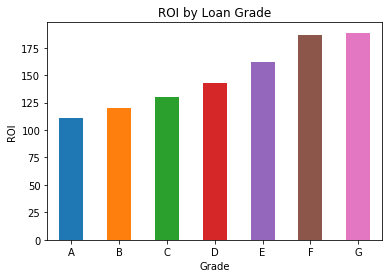

In [18]:
df.groupby('grade').roi.mean().plot(kind='bar')
plt.title('ROI by Loan Grade')
plt.xlabel('Grade')
plt.ylabel('ROI')
plt.xticks(rotation=0);

<p>However, with the exception of educational loans, there is no significant difference in terms of ROI when you group by loan purpose. Educational loans should be treated as a special case because Lending Club only originated 1 educational loan during Q4.<p>

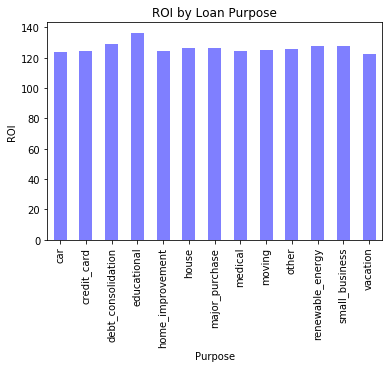

In [19]:
df.groupby('purpose').roi.mean().plot.bar(color='blue', alpha=0.5)
plt.title('ROI by Loan Purpose')
plt.ylabel('ROI')
plt.xlabel('Purpose');

<p>There was a significant difference when you factor in term though. In general, 60 month loans provide a higher ROI than 36 month loans.

In [20]:
df.groupby('term').roi.mean()

term
 36 months    119.223295
 60 months    145.075595
Name: roi, dtype: float64

<p>That is over a 30% difference in ROI based on term alone! If the ROI on 60 month loans are greater than 36 months then why doesn't Lending Club only offer 60 month loans? They actually offer nearly 2x more 36 month loans than 60 month loans.</p>

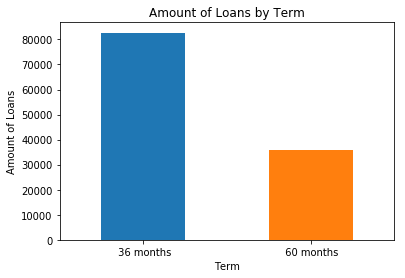

In [22]:
df.term.value_counts().plot(kind='bar')
plt.title('Amount of Loans by Term')
plt.xlabel('Term')
plt.ylabel('Amount of Loans')
plt.xticks(rotation=0);

<p>The answer is simply optimization. We can get a sense of what that optimization would look like when we take both loan grade and term into account.</p>

In [21]:
roi_df = (df.groupby(['grade','term']).roi.mean()).to_frame()
roi_df.head(3)

roi
grade term                  
A      36 months  111.050981
       60 months  120.087815
B      36 months  117.032344

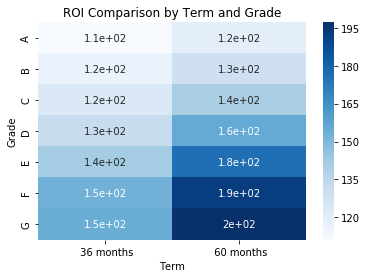

In [23]:
#reshaping the df and setting new columns
roi_df_unstacked = roi_df.unstack()
roi_df_unstacked.columns = roi_df_unstacked.columns.get_level_values(1)

sns.heatmap(roi_df_unstacked, annot=True, cmap='Blues')
plt.title('ROI Comparison by Term and Grade')
plt.xlabel('Term')
plt.ylabel('Grade');

<p>There are two key insights we can take from the heatmap above. First, 60 month D-G loans are the most profitable loans in terms of ROI. Second, we can see that 60 month A-C loans are not significantly more profitable than a 36 month loans and answers my question - Why doesn't Lending Club only offer 36 month loans? It doesn't make sense from a business standpoint to offer a 60 month loan when a 36 month loan of a different grade is sufficient. This is also good from a consumer persective. Consumers can potentially save up to 40% in total loan payments by sticking to a 36 month term. </p>

<h1>Notes and Comments on Further Research</h1>

<p> Two of my three initial hypotheses were correct. There is no correlation between loan amount and interest rate, and business loans tend to have larger loan amounts than any other loan type. I was incorrect about the types of loans Lending Club offers, however. It seems as if Lending Club is primarily a consumer loan company, and more specifically, a debt consolidation company. I had no prior opinion regarding ROI on the loans and was surprised to learn that loan purpose has no significant effect ROI. If I were to dig further into ROI, I am confident the data would lend itself to the creation of an optimization model. </p>

<p>The data I focused on was restricted to Q4 2017 and while sufficient for this high level type of analysis, using a full year's worth of data would lend to more insights. Also, there was a key ommission from the data - credit scores. The addition of credit scores would allow us to dig deeper in the grading system to identify credit profiles and any gaps there may be. </p>

<p>One area of future research relates specifically to business lending and how we grade risk. If we had historical data for business loans that also included industry type, business credit, and personal credit we could start to build models illustrating the correlation or lack there of and add transparency for business owners and business lenders. </p>